<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=center>
   <br>
    <font face="Times New Roman" size=18>
    <p></p>
    In the name of God  
    </font>
    <br><br>
    <font face="Times New Roman" size=5 color=blue>
    Python for Data Mining<br>      </font>
    <font face="Times New Roman" size=4 color=blue> 
        Insurance Research Center
    </font>
    <br>
    <br>
    <font face="Times New Roman" size=4 color=#FF7500>
    Khayyam Salehi 
    </font>
    <br>       
    <font face="Times New Roman" size=3 color=#FF7500>
    Assistant Professor
    <br>
    Department of Computer science
    <br>
    Shahrekord University
    </font>
    <br>    <br>
</div>

<hr style="border:2px solid black"> </hr>

# Regression

* History and theory behind it
* Simple impplementation using Numpy
* Scikit-Learn Overview
* Linear Regression with Scikit-Learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data

https://www.statlearning.com/s/Advertising.csv

In [2]:
df = pd.read_csv("./data/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop("Unnamed: 0", axis = 1, inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Simple Linear Regression
**A relationship between total advertising and sales?**

In [5]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

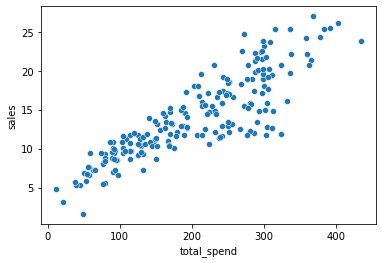

In [6]:
sns.scatterplot(x='total_spend',y='sales',data=df)

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

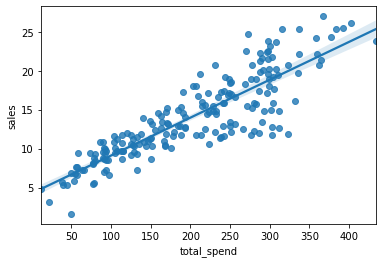

In [7]:
# how many units do we expect to sell as a result of spending $200?
sns.regplot(x='total_spend',y='sales',data=df)

In [17]:
X = df['total_spend']
y = df['sales']

In [9]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [10]:
# Returns polynomial coefficients, highest power first.
# y = b1 * x + b0

np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

**Draw the regeression line**

In [18]:
potential_spend = np.linspace(0,500,100)

In [19]:
predicted_sales =  0.04868788*potential_spend + 4.24302822

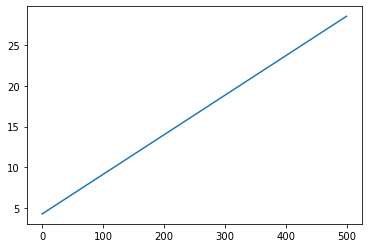

In [20]:
plt.plot(potential_spend,predicted_sales)

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

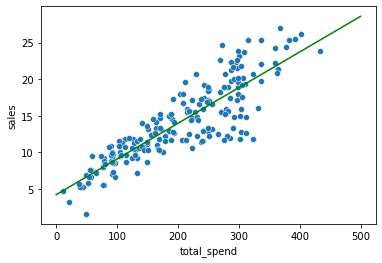

In [21]:
plt.plot(potential_spend,predicted_sales, c = 'g')
sns.scatterplot(x='total_spend',y='sales',data=df)

In [22]:
spend = 200
predicted =  0.04868788*spend + 4.24302822
predicted

13.98060422

## Other degrees

In [23]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [24]:
potential_spend = np.linspace(0,500,100)

In [25]:
predicted_sales =   3.07615033e-07*potential_spend**3 + \
                    -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend**1\
                    + 2.70495053e+00

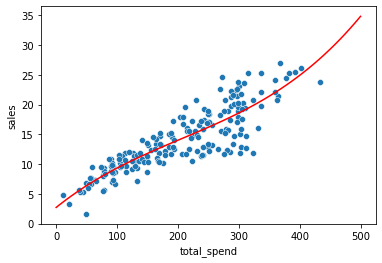

In [26]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

In [27]:
np.polyfit(X,y,6)

array([-1.30786313e-13,  1.54404829e-10, -6.89374865e-08,  1.49136731e-05,
       -1.70188271e-03,  1.53007308e-01,  1.56306006e+00])

In [28]:
potential_spend = np.linspace(0,500,100)

In [29]:
predicted_sales =   -1.30786313e-13*potential_spend**6 + \
                     1.54404829e-10*potential_spend**5 + -6.89374865e-08*potential_spend**4 + \
                     1.49136731e-05*potential_spend**3 + -1.70188271e-03*potential_spend**2 + \
                    1.53007308e-01 *potential_spend**1 + 1.56306006e+00

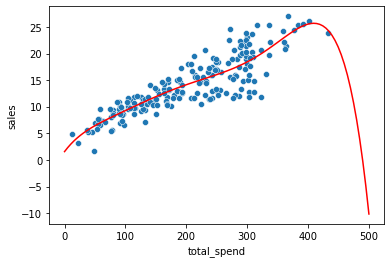

In [30]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

## Multiple Features

In [31]:
X = df[['TV','radio','newspaper']]
y = df['sales']
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [32]:
np.polyfit(X,y,1)

TypeError: expected 1D vector for x

**What is the relationship between each advertising (TV,Radio,Newspaper) and sales?**

<img src="./figs/scikit-learn-logo.png" width=400px/>

# Scikit-Learn


<img src="./figs/scikit-learn-algorithms.png" width=1000px/>

## Framework:
1. Splitting into train and test sets:

`from sklearn.model_selection import train_test_split`<br>
`X_train, X_test, y_train, y_test = train_test_split(X, y)`

2. Importing model algorithms:

`from sklearn.model_family import ModelAlgorithm`<br>

3. Creating an instance of the model:

`mymodel = ModelAlgorithm(param_1, param_2, ...)`

4. Training the model:

`mymodel.fit(X_train, y_train)`

5. Predicting the $\hat{y}$:

`predictions = mymodel.predict(X_test)`

6. Importing error metrics

`from sklearn.metrics import error_metric`

7. Comparing with y_test:

`performance = error_metric(y_test, predictions)`

## Data

In [33]:
df = pd.read_csv("./data/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [34]:
df.drop("Unnamed: 0", axis = 1, inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


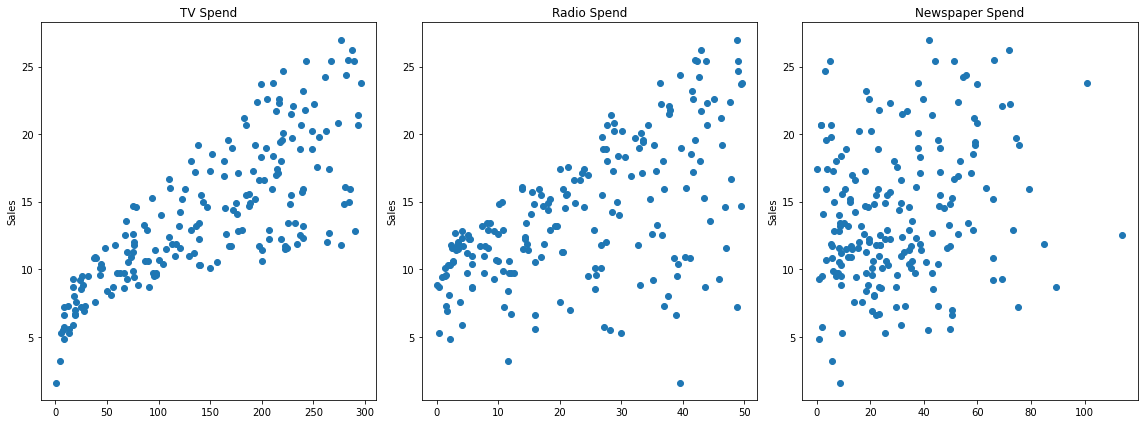

In [35]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

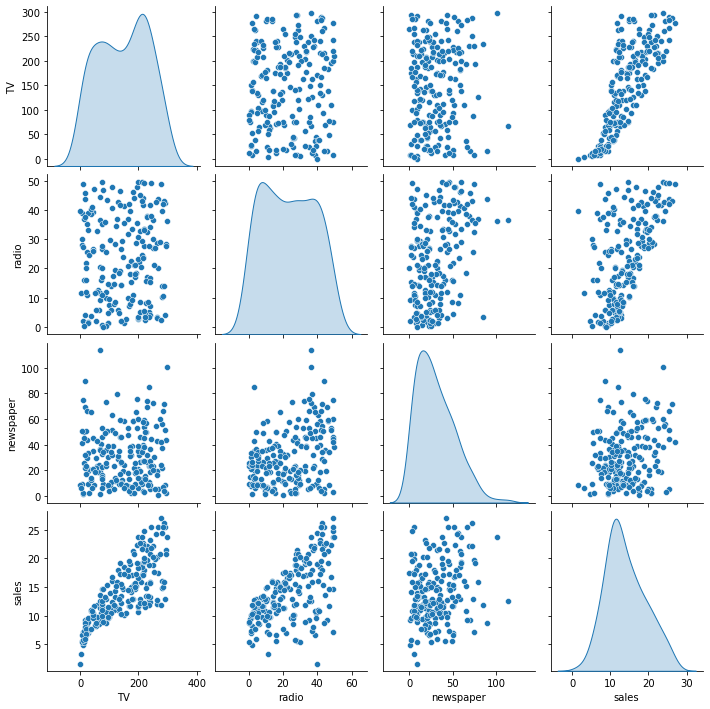

In [36]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

In [40]:
X = df.drop('sales',axis=1)
y = df['sales']
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


**Maybe, some sort of standardization or normalization are needed!**

## Splitting into Train & Test Sets

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to t

In [59]:
# test_size is around 0.2 and 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [60]:
X_train

,TV,radio,newspaper
20,218.4,27.7,53.4
10,66.1,5.8,24.2
128,220.3,49.0,3.2
40,202.5,22.3,31.6
5,8.7,48.9,75.0
...,...,...,...
190,39.5,41.1,5.8
124,229.5,32.3,74.2
54,262.7,28.8,15.9
133,219.8,33.5,45.1


In [61]:
y_train

20     18.0
10      8.6
128    24.7
40     16.6
5       7.2
       ... 
190    10.8
124    19.7
54     20.2
133    19.6
43     12.9
Name: sales, Length: 140, dtype: float64

In [62]:
X_test

,TV,radio,newspaper
122,224.0,2.4,15.6
186,139.5,2.1,26.6
167,206.8,5.2,19.4
101,296.4,36.3,100.9
29,70.6,16.0,40.8
75,16.9,43.7,89.4
144,96.2,14.8,38.9
28,248.8,27.1,22.9
121,18.8,21.7,50.4
182,56.2,5.7,29.7


In [63]:
y_test

122    11.6
186    10.3
167    12.2
101    23.8
29     10.5
75      8.7
144    11.4
28     18.9
121     7.0
182     8.7
27     15.9
181    12.2
39     21.5
23     15.5
2       9.3
173    11.7
107     8.7
17     24.4
109    19.8
118    15.9
26     15.0
46     10.6
21     12.5
160    14.4
44      8.5
143    10.4
56      5.5
188    15.9
79     11.0
73     11.0
164    11.9
18     11.3
102    14.8
131    12.7
96     11.7
141    19.2
115    12.6
174    11.5
130     1.6
34      9.5
156    15.3
154    15.6
153    19.0
197    12.8
185    22.6
113    15.9
33     17.4
169    15.0
183    26.2
14     19.0
136     9.5
22      5.6
86     12.0
145    10.3
168    17.1
85     15.2
117     9.4
57     13.2
31     11.9
97     15.5
Name: sales, dtype: float64

## Creating a Model (Estimator)
### Import a model class from a model family

In [64]:
from sklearn.linear_model import LinearRegression

### Create an instance of the model with parameters

In [65]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtr

In [66]:
model = LinearRegression()

### Fit or train the model on the training data

**Only fit to the training data**

In [67]:
model.fit(X_train,y_train)

LinearRegression()

## Using the model

### Evaluation on the test set

In [68]:
test_predictions = model.predict(X_test)
test_predictions  

array([13.72572578,  9.72240864, 13.45519441, 23.09056837,  9.16448861,
       11.7657469 , 10.11868231, 19.60101978,  7.83201008,  6.57738068,
       17.18840537, 13.98205349, 20.6429174 , 16.66542454, 12.32808985,
       12.10093965,  7.14126867, 23.31625485, 19.97140562, 15.50493767,
       15.22953122,  8.89130909, 14.81518986, 14.30934175,  8.93883854,
        8.76999895,  8.59812376, 18.87010689,  9.74934567,  9.92710827,
       11.2675752 , 10.1087144 , 17.76024796, 15.54615036, 12.78625645,
       18.35736608, 12.97658451, 13.86114212, 10.72107765,  7.69389229,
       15.49834296, 15.72169067, 18.3930769 , 12.96059256, 21.0955828 ,
       16.61807664, 19.13550192, 18.13676155, 24.16135234, 18.53135717,
       11.7440403 ,  6.4570635 , 11.80373085,  9.82782582, 17.17878634,
       15.10382122,  6.64680572, 12.94236959, 11.39028763, 15.49294495])

### Measuring the performance

#### Metrics

**Mean Absolute Error** (MAE):

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE):

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE):

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Note that:

- **MAE** is the easiest one to understand;
- **MSE** is more popular than MAE, because MSE "punishes" larger errors;
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [70]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [71]:
MAE

1.3654567890610607

In [72]:
MSE

3.7495203698290354

In [73]:
RMSE

1.936367829165997

**What's the good RMSE?**

In [74]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

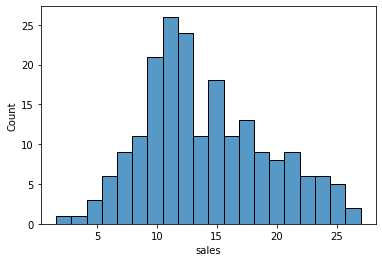

In [75]:
sns.histplot(data = df, x = 'sales', bins= 20)

**Are good enough?**

## Residual

<img src='./figs/linear-regresion-obstacle.png' width=800px/>

**What about multiple feature?**

**Residual plot -> similar to Normal distribution**

In [76]:
test_residual = y_test - test_predictions
test_residual

122   -2.125726
186    0.577591
167   -1.255194
101    0.709432
29     1.335511
75    -3.065747
144    1.281318
28    -0.701020
121   -0.832010
182    2.122619
27    -1.288405
181   -1.782053
39     0.857083
23    -1.165425
2     -3.028090
173   -0.400940
107    1.558731
17     1.083745
109   -0.171406
118    0.395062
26    -0.229531
46     1.708691
21    -2.315190
160    0.090658
44    -0.438839
143    1.630001
56    -3.098124
188   -2.970107
79     1.250654
73     1.072892
164    0.632425
18     1.191286
102   -2.960248
131   -2.846150
96    -1.086256
141    0.842634
115   -0.376585
174   -2.361142
130   -9.121078
34     1.806108
156   -0.198343
154   -0.121691
153    0.606923
197   -0.160593
185    1.504417
113   -0.718077
33    -1.735502
169   -3.136762
183    2.038648
14     0.468643
136   -2.244040
22    -0.857063
86     0.196269
145    0.472174
168   -0.078786
85     0.096179
117    2.753194
57     0.257630
31     0.509712
97     0.007055
Name: sales, dtype: float64

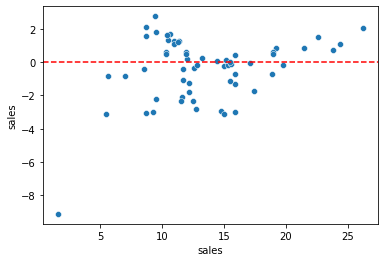

In [77]:
sns.scatterplot(x=y_test,y=test_residual)
plt.axhline(y=0, color='r', linestyle='--')

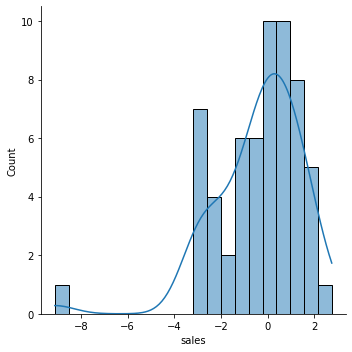

In [78]:
sns.displot(test_residual,bins=20,kde=True)

**Further reading on residual plot:<br>**
https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/

## Exploiting the final model on the entire data

* Before deploying, retraining on the entire data

In [79]:
final_model = LinearRegression()

In [80]:
final_model.fit(X,y)

LinearRegression()

In [81]:
y_hat = final_model.predict(X)

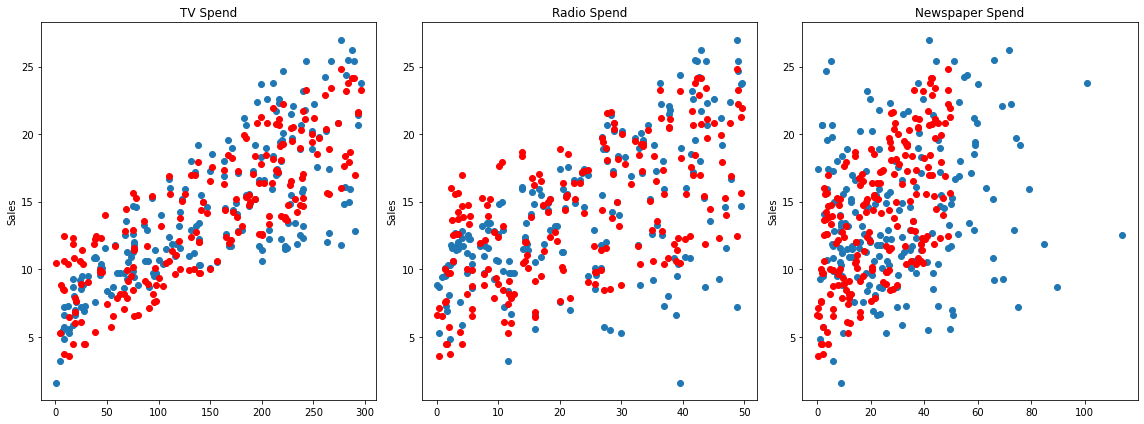

In [82]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

### Residuals:

In [85]:
residuals = y - y_hat

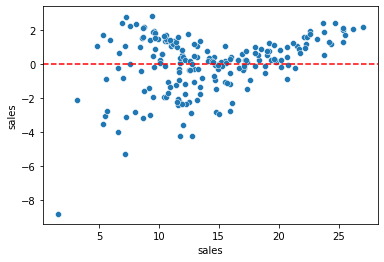

In [86]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

### Coefficients:

In [87]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [88]:
X.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [89]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


**Interpreting the coefficients?**

### Prediction on New Data

In [90]:
newdata = [[149,100,50]]

In [91]:
final_model.predict(newdata)

array([28.55894858])

## Deploying: Saving and Loading a Model

In [92]:
from joblib import dump, load

In [93]:
dump(final_model, 'sales_model.joblib') 

['sales_model.joblib']

In [94]:
loaded_model = load('sales_model.joblib')

In [95]:
loaded_model.predict(newdata)

array([28.55894858])

# Exercise

**Implementing the linear regression using Numpy arrays!**